In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [ ]:
!kaggle datasets download -d rahimanshu/cardiomegaly-disease-prediction-using-cnn

 92% 57.0M/61.7M [00:00<00:00, 97.8MB/s]
100% 61.7M/61.7M [00:00<00:00, 98.3MB/s]


In [ ]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import all libraries needed
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import splitfolders
import cv2
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, MaxPooling2D, AveragePooling2D, Conv2D
from sklearn.preprocessing import LabelEncoder

In [ ]:
loc_zip = 'cardiomegaly-disease-prediction-using-cnn.zip'
zip_ref = zipfile.ZipFile(loc_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Make image directory path

train_dir = '/content/train/train'
val_dir = '/content/test/test'

In [ ]:
!mkdir '/content/img'
!mkdir '/content/img/true'
!mkdir '/content/img/false'

In [ ]:
# Move of true

t_train = os.path.join(train_dir, 'true')
t_val = os.path.join(val_dir, 'true')

t_list = [t_train, t_val]
destination = '/content/img/true'


for source in t_list:
  allfiles = os.listdir(source)
  # print(allfiles)
  for f in allfiles:
      shutil.move(source +'/' + f, destination +'/' + f)



In [ ]:
# Move of false

t_train = os.path.join(train_dir, 'false')
t_val = os.path.join(val_dir, 'false')

t_list = [t_train, t_val]
destination = '/content/img/false'


for source in t_list:
  allfiles = os.listdir(source)
  # print(allfiles)
  for f in allfiles:
      shutil.move(source +'/' + f, destination +'/' + f)



In [ ]:
!mkdir '/content/img/split'

data_dir = '/content/img'
output = '/content/img/split'

splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7,0.1,0.2))

Copying files: 4438 files [00:00, 4653.15 files/s]


In [ ]:
baseDir= '/content/img/split'
trainDir = os.path.join(baseDir, 'train')
valDir = os.path.join(baseDir,'val')
testDir = os.path.join(baseDir,'test')

In [ ]:
# Gather train data

x_train = []
y_train = []

for r,d,f in os.walk(trainDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_train.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)



In [ ]:
# Gather validation data

x_val = []
y_val = []

for r,d,f in os.walk(valDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_val.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
# Gather validation data

x_test = []
y_test = []

for r,d,f in os.walk(testDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_test.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print("Train Data=", x_train.shape)
print("Train Label=", y_train.shape)
print("Validation Data=", x_val.shape)
print("Validation Label=", y_val.shape)
print("Test Data=", x_test.shape)
print("Test Label=", y_test.shape)

Train Data= (3106, 128, 128, 3)
Train Label= (3106,)
Validation Data= (442, 128, 128, 3)
Validation Label= (442,)
Test Data= (890, 128, 128, 3)
Test Label= (890,)


In [ ]:
# label encoder implementation in each train & test label
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)

In [ ]:
t = 0
f = 0

for i in y_train:
  if i == 0:
    f+=1
  else :
    t+=1

print('True = ', t)
print('False = ', f)

True =  1553
False =  1553


Dikarenakan Dataset sudah balance maka tidak perlu dilakukan downsampli/oversampling

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_iterator = train_datagen.flow([x_train,x_train], y_train, batch_size=64)

In [ ]:
val_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_iterator = val_datagen.flow([x_val,x_val], y_val, batch_size=64)


In [ ]:
test_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_iterator = test_datagen.flow([x_test,x_test], y_test, batch_size=64)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
baseModel = VGG16(include_top=False,pooling='avg', input_tensor=Input(shape=(128, 128, 3)))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications.densenet import DenseNet169
baseModel2= DenseNet169(include_top=False,pooling='avg', input_tensor=Input(shape=(128, 128, 3)))

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import concatenate

headModel = baseModel.output
headModel2 = baseModel2.output

headModel = concatenate([headModel, headModel2])
headModel = Flatten(name="flatten")(headModel2)
headModel = Dense(256, activation='elu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation='softmax')(headModel)


In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs=[baseModel.input,baseModel2.input], outputs=headModel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-3), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_acc') > 0.81):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(0.81*100))   
          self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
H1 = model.fit(train_iterator, epochs=150, validation_data=val_iterator, callbacks=[callbacks])

Epoch 1/150
49/49 [==============================] - 70s 606ms/step - loss: 0.8950 - acc: 0.6095 - val_loss: 31.2130 - val_acc: 0.5000
Epoch 2/150
49/49 [==============================] - 20s 408ms/step - loss: 0.6084 - acc: 0.7115 - val_loss: 1.7617 - val_acc: 0.5249
Epoch 3/150
49/49 [==============================] - 20s 398ms/step - loss: 0.5432 - acc: 0.7518 - val_loss: 44.7680 - val_acc: 0.4955
Epoch 4/150
49/49 [==============================] - 20s 398ms/step - loss: 0.4652 - acc: 0.7807 - val_loss: 2.5464 - val_acc: 0.6810
Epoch 5/150
49/49 [==============================] - 20s 400ms/step - loss: 0.4403 - acc: 0.8049 - val_loss: 0.5645 - val_acc: 0.7964
Epoch 6/150
49/49 [==============================] - 20s 398ms/step - loss: 0.3930 - acc: 0.8278 - val_loss: 0.9263 - val_acc: 0.7443
Epoch 7/150
49/49 [==============================] - 20s 401ms/step - loss: 0.3377 - acc: 0.8529 - val_loss: 0.6464 - val_acc: 0.7579
Epoch 8/150
49/49 [==============================] - 20s 398

In [ ]:
model.save('/content/drive/MyDrive/model_moduk 6.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pred = model.predict([x_val,x_val])

14/14 [==============================] - 7s 152ms/step


In [ ]:
c = np.array(x_test[0])

model.predict([c,c])[0]


InvalidArgumentError: ignored

In [ ]:
model_dict = {'CNN'   :   r'G:\UMM\Semester 7\ML\Modul 6\aplikasi-web-deteksi-covid19\Aplikasi Klasifikasi Covid 19\static\MLModule\model_moduk cnn 6.h5',
                  'Transferlearning'     :   r'G:\UMM\Semester 7\ML\Modul 6\aplikasi-web-deteksi-covid19\Aplikasi Klasifikasi Covid 19\static\MLModule\model_moduk 6.h5',}
    

In [ ]:
model_dict['CNN']

'G:\\UMM\\Semester 7\\ML\\Modul 6\\aplikasi-web-deteksi-covid19\\Aplikasi Klasifikasi Covid 19\\static\\MLModule\\model_moduk cnn 6.h5'

In [ ]:
labels = []
for i in pred:
  if i[0]>i[1]:
    labels.append(0)
  else:
    labels.append(1)

In [ ]:
print(classification_report(y_val,labels))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       221
           1       0.81      0.80      0.80       221

    accuracy                           0.80       442
   macro avg       0.80      0.80      0.80       442
weighted avg       0.80      0.80      0.80       442



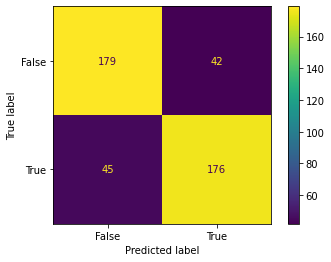

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusionM = confusion_matrix(y_val, labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionM, display_labels = [False, True])
cm_display.plot()
plt.show()

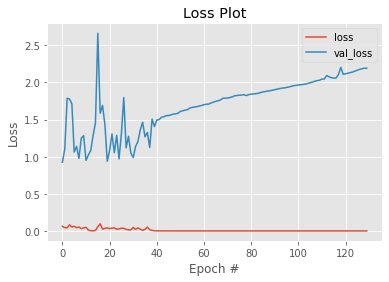

In [ ]:
# loss plot
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 130), H1.history["loss"][20:], label="loss")
plt.plot(np.arange(0, 130), H1.history["val_loss"][20:], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
vl = H1.history["val_loss"].copy()

In [ ]:
vl.remove(H1.history["val_loss"][16])

In [ ]:
vl.remove(H1.history["val_loss"][17])

In [ ]:
l = H1.history["loss"].copy()

In [ ]:
l.remove(H1.history["loss"][16])
l.remove(H1.history["loss"][17])

In [ ]:
len(l)

112

In [ ]:
len(vl)

112

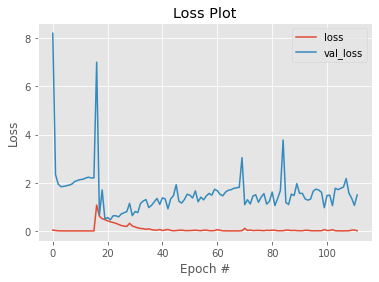

In [ ]:
# loss plot
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 112), l, label="loss")
plt.plot(np.arange(0, 112), vl, label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
x_train = x_train.reshape(3106,49152)

In [ ]:
x_train.shape

(3106, 49152)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C = 1.0, gamma = 0.1)
clf_svm = svm.fit(x_train, y_train)

In [ ]:
print("training accuracy :", clf_svm.score(x_train, y_train))


training accuracy : 1.0


In [ ]:
x_test.shape

(890, 128, 128, 3)

In [ ]:
x_test = x_test.reshape(890,49152)

In [ ]:
print("testing accuracy :", clf_svm.score(x_test, y_test))

testing accuracy : 0.5


In [ ]:
# Gather train data

x_train = []
y_train = []

for r,d,f in os.walk(trainDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_train.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)



In [ ]:
# Gather validation data

x_val = []
y_val = []

for r,d,f in os.walk(valDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_val.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
# Gather validation data

x_test = []
y_test = []

for r,d,f in os.walk(testDir):
  for file in f:
    if ".png" in file:
      image_path = os.path.join(r,file)
      image = cv2.imread(image_path)
      image = cv2.resize(image, (128,128))
      x_test.append(image)
      label = image_path.split(os.path.sep)[-2]
      y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print("Train Data=", x_train.shape)
print("Train Label=", y_train.shape)
print("Validation Data=", x_val.shape)
print("Validation Label=", y_val.shape)
print("Test Data=", x_test.shape)
print("Test Label=", y_test.shape)

Train Data= (3106, 128, 128, 3)
Train Label= (3106,)
Validation Data= (442, 128, 128, 3)
Validation Label= (442,)
Test Data= (890, 128, 128, 3)
Test Label= (890,)


In [ ]:
# label encoder implementation in each train & test label
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)

In [ ]:
# normalize the scale in every images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# implement ImageDataGenerator in train, test data, & each label
train_iterator = datagen.flow(x_train, y_train, batch_size=64)
val_iterator = datagen.flow(x_val, y_val, batch_size=64)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

Batches train=49, validation=7


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
model_2= Sequential()
model_2.add(InputLayer(input_shape=[128,128,3]))

model_2.add(Conv2D(32,3,padding='same',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(MaxPooling2D(padding='same'))

model_2.add(Conv2D(64,3,padding='same',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(MaxPooling2D(padding='same'))

model_2.add(Conv2D(128,3,padding='same',activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.2))
model_2.add(MaxPooling2D(padding='same'))

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       2

In [ ]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
# training & saving history of every epoch on model 2
H2 = model_2.fit(train_iterator, epochs=100, validation_data=val_iterator)

Epoch 1/100
49/49 [==============================] - 6s 93ms/step - loss: 1.1006 - accuracy: 0.5724 - val_loss: 6.5851 - val_accuracy: 0.5000
Epoch 2/100
49/49 [==============================] - 3s 68ms/step - loss: 0.6163 - accuracy: 0.6648 - val_loss: 9.5681 - val_accuracy: 0.5000
Epoch 3/100
49/49 [==============================] - 3s 68ms/step - loss: 0.5466 - accuracy: 0.7196 - val_loss: 7.9280 - val_accuracy: 0.5000
Epoch 4/100
49/49 [==============================] - 3s 69ms/step - loss: 0.5176 - accuracy: 0.7263 - val_loss: 2.2719 - val_accuracy: 0.5294
Epoch 5/100
49/49 [==============================] - 3s 69ms/step - loss: 0.4485 - accuracy: 0.7830 - val_loss: 0.7461 - val_accuracy: 0.5158
Epoch 6/100
49/49 [==============================] - 3s 69ms/step - loss: 0.4226 - accuracy: 0.7978 - val_loss: 0.8388 - val_accuracy: 0.5475
Epoch 7/100
49/49 [==============================] - 3s 69ms/step - loss: 0.3665 - accuracy: 0.8390 - val_loss: 1.0035 - val_accuracy: 0.5452
Epoch 

In [ ]:
model_2.save('/content/drive/MyDrive/model_moduk cnn 6.h5')